# Data Cleaning

In [ ]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [ ]:
df_raw = pd.read_csv('raw_data_july_21st.csv') 

print('Done')

Done


### Delete duplicate rows

In [ ]:
# Drop 'Listing ID' column to identify duplicates, otherwise it wont find duplicates
df_raw_noListing = df_raw.drop(columns=['Listing ID'])

# Identify duplicates
duplicates_mask = df_raw_noListing.duplicated()

# Number of duplicate rows
num_duplicates = duplicates_mask.sum()
print(f"Found {num_duplicates} duplicate rows.")

# Remove duplicate rows from the original DataFrame while maintaining 'Listing ID'
df_raw = df_raw[~duplicates_mask].reset_index(drop=True)

# Print information about the cleaning process
print(f"Rows deleted: {num_duplicates}")

Found 12 duplicate rows.
Rows deleted: 12


### Delete rows with empty cells

In [ ]:
def delete_rows_with_empty_cells(df):
    empty_cells_count = df.isnull().sum().sum()  
    rows_before = df.shape[0]  
    df.dropna(inplace=True)  
    rows_after = df.shape[0]  
    rows_deleted = rows_before - rows_after  
    
    return empty_cells_count, rows_deleted

# Apply the function to the existing DataFrame
empty_cells_count, rows_deleted = delete_rows_with_empty_cells(df_raw)

print(f"Found {empty_cells_count} empty cells.")
print(f"Rows deleted: {rows_deleted}")

Found 1374 empty cells.
Rows deleted: 1297


In [ ]:
print(f"Rows after cleaning: {df_raw.shape[0]} \n")
print(df_raw.head(3))

Rows after cleaning: 83366 

                             Listing ID      Trim       Make  Year  \
0  f41e479e-4d07-42ba-850c-9f9dd21a0d2f  lt cloth  chevrolet  2020   
1  04de8d78-9d1a-407d-aa08-4259f598f589       1lt  chevrolet  2016   
2  0ceae6e2-43bd-4a6d-9eaf-ac5ae2a7a703    custom  chevrolet  2021   

            Model    Price    Body Style           City State  Mileage  \
0        traverse  25988.0           suv     Pittsburgh    PA    51375   
1  silverado 1500  23995.0  pickup truck    Tallahassee    FL    98658   
2  silverado 1500  32980.0  pickup truck  East Hartford    CT    53326   

  Stock Type  
0       used  
1       used  
2       used  


### Format Price (remove decimal)

In [ ]:
# Convert 'price' column to integer, gets rid of float
df_raw['Price'] = df_raw['Price'].astype(int)
df_raw.head(3)

,Listing ID,Trim,Make,Year,Model,Price,Body Style,City,State,Mileage,Stock Type
0,f41e479e-4d07-42ba-850c-9f9dd21a0d2f,lt cloth,chevrolet,2020,traverse,25988,suv,Pittsburgh,PA,51375,used
1,04de8d78-9d1a-407d-aa08-4259f598f589,1lt,chevrolet,2016,silverado 1500,23995,pickup truck,Tallahassee,FL,98658,used
2,0ceae6e2-43bd-4a6d-9eaf-ac5ae2a7a703,custom,chevrolet,2021,silverado 1500,32980,pickup truck,East Hartford,CT,53326,used


## Format Model & Trim

#### Models

In [ ]:
# Count all models by letter so i can combine and drop unnecessary models 
# Iterate thru]ough 1 lettter at a time
count = df_raw[df_raw['Model'].str.startswith('a')]
count['Model'].value_counts()

Model
altima              1422
acadia              1375
accord              1267
ascent               641
armada               293
accord hybrid        164
accent               153
avalon                77
avalon hybrid         31
avalanche             26
ariya                 26
acadia limited        25
azera                 12
accord crosstour       7
aveo                   1
Name: count, dtype: int64

In [ ]:
# combining models and correcting typos for consistency 

# a models
# none

# b models
# none

# c models
df_raw['Model'] = df_raw['Model'].replace('cr_v', 'cr-v') # replaces the model name
df_raw['Model'] = df_raw['Model'].replace('cr_v hybrid', 'cr-v hybrid')
df_raw['Model'] = df_raw['Model'].replace('c_hr', 'c-hr')
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} si" if row['Model'] == 'civic si' else row['Trim'], axis=1) # adds value to trim
df_raw['Model'] = df_raw['Model'].replace('civic si', 'civic')
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} type r" if row['Model'] == 'civic type r' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('civic type r', 'civic')
df_raw['Model'] = df_raw['Model'].replace('clarity plug_in hybrid', 'clarity plug-in hybrid')
df_raw['Model'] = df_raw['Model'].replace('corvette stingray', 'corvette') # stingray is base model for c7 and c8
df_raw['Model'] = df_raw['Model'].replace('c_max energi', 'c-max energi')
df_raw['Model'] = df_raw['Model'].replace('c_max hybrid', 'c-max hybrid')
df_raw['Model'] = df_raw['Model'].replace('cr_z', 'cr-z')

# d models
# none

# e models
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} n" if row['Model'] == 'elantra n' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('elantra n', 'elantra')
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} max" if row['Model'] == 'expedition max' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('expedition max', 'expedition')
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} super duty" if row['Model'] == 'e350 super duty' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('e350 super duty', 'e350')

# f models
df_raw['Model'] = df_raw['Model'].replace('f_150', 'f-150')
df_raw['Model'] = df_raw['Model'].replace('f_250', 'f-250')
df_raw['Model'] = df_raw['Model'].replace('f_350', 'f-350')
df_raw['Model'] = df_raw['Model'].replace('f_450', 'f-450')
df_raw['Model'] = df_raw['Model'].replace('f_150 lightning', 'f-150 lightning')
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} st" if row['Model'] == 'focus st' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('focus st', 'focus')
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} rs" if row['Model'] == 'focus rs' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('focus rs', 'focus')

# g models
df_raw['Model'] = df_raw['Model'].replace('gt_r', 'gt-r')

# h models
df_raw['Model'] = df_raw['Model'].replace('hr_v', 'hr-v')

# i models
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} sti" if row['Model'] == 'impreza wrx sti' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('impreza wrx sti', 'impreza wrx')
df_raw['Trim'] = df_raw.apply(lambda row: f"{row['Trim']} outback sport" if row['Model'] == 'impreza outback sport' else row['Trim'], axis=1)
df_raw['Model'] = df_raw['Model'].replace('impreza outback sport', 'impreza')

# j models
# none 

# k models
# none

# l models
# none

# m models
df_raw['Model'] = df_raw['Model'].replace('mustang mach_e', 'mustang mach-e')

# n models
df_raw['Model'] = df_raw['Model'].replace('nv cargo', 'nv cargo nv1500')
df_raw['Model'] = df_raw['Model'].replace('niro plug_in hybrid', 'niro plug-in hybrid')

# o models
df_raw['Model'] = df_raw['Model'].replace('optima plug_in hybrid', 'optima plug-in hybrid')

# p models
df_raw['Model'] = df_raw['Model'].replace('prius plug_in', 'prius plug-in')

# q models
# none

# r models
# none

# s models
df_raw['Model'] = df_raw['Model'].replace('silverado 1500 ld', 'silverado 1500')
df_raw['Model'] = df_raw['Model'].replace('santa fe plug_in hybrid', 'santa fe plug-in hybrid')
df_raw['Model'] = df_raw['Model'].replace('sonata plug_in hybrid', 'sonata plug-in hybrid')
df_raw['Model'] = df_raw['Model'].replace('sorento plug_in hybrid', 'sorento plug-in hybrid')
df_raw['Model'] = df_raw['Model'].replace('sportage plug_in hybrid', 'sportage plug-in hybrid')

# t models
df_raw['Model'] = df_raw['Model'].replace('transit_150', 'transit 150')
df_raw['Model'] = df_raw['Model'].replace('transit_250', 'transit 250')
df_raw['Model'] = df_raw['Model'].replace('transit_350', 'transit 350')
df_raw['Model'] = df_raw['Model'].replace('tucson plug_in hybrid', 'tucson plug-in hybrid')

# u models
# none

# v models
# none

# w models
# none

# x models
# none

# y models
# none

# z models
# none

# 1-9 models
# none

print('Models Formated')

Models Formated


#### Trim

In [ ]:
# Group by 'Make', 'Model', and 'Trim' and count occurrences
trim_counts = df_raw.groupby(['Make', 'Model', 'Trim']).size().reset_index(name='Count')

# Sort the data for better readability
trim_counts = trim_counts.sort_values(by=['Make', 'Model', 'Count'], ascending=[True, True, False])

# To print trim counts by make
for make in trim_counts['Make'].unique():
    make_df = trim_counts[trim_counts['Make'] == make]
    print(f"Make: {make}")
    for model in make_df['Model'].unique():
        model_df = make_df[make_df['Model'] == model]
        print(f"  Model: {model}")
        print(model_df[['Trim', 'Count']])
        print('\n')

Make: chevrolet
  Model: avalanche
       Trim  Count
5       ltz      7
1   1500 lt      6
2  1500 ltz      5
4        lt      4
0   1500 ls      3
3        ls      1


  Model: aveo
   Trim  Count
6  5 ls      1


  Model: blazer
       Trim  Count
8       2lt    135
13       rs     68
9       3lt     30
11       lt     16
12  premier     14
7       1lt     12
10     base      1


  Model: blazer ev
   Trim  Count
14  2lt      1
15   rs      1


  Model: bolt euv
               Trim  Count
16           fwd lt     24
17      fwd premier      9
18               lt      7
20          premier      4
19  lt hatchback 4d      1


  Model: bolt ev
               Trim  Count
24           fwd lt     23
25      fwd premier     23
26               lt     18
28          premier      8
21              1lt      6
23          fwd 2lt      5
22          fwd 1lt      4
27  lt hatchback 4d      1


  Model: camaro
                   Trim  Count
34                  2ss    100
30                  1lt   

In [ ]:
# combining trims for models and correcting typos for consistency and cleaning

# Create a dictionary for trim name replacements
# combining trims for models and correcting typos for consistency and cleaning

# Create a dictionary for trim name replacements
# Use a dictionary with .replace at the end to organize trims easier 

trim_formatting = {

# Chevrolet Models & Trim    
    'chevrolet': {
        'avalanche': {
            '1500 ltz': 'ltz',
            '1500 lt': 'lt',
            '1500 ls': 'ls',
        },
        'aveo': {
            '5 ls': 'ls',
        },
        'blazer': {
            'base': 'lt',
        },
        'bolt euv': {
            'fwd premier': 'premier',
            'fwd lt': 'lt',
            'lt hatchback 4d': 'lt',
        },
        'bolt ev': {
            'fwd premier': 'premier',
            'fwd lt': 'lt',
            'fwd 1lt': '1lt',
            'fwd 2lt': '2lt',
            'lt hatchback 4d': 'lt',
        },
        'camaro': {
            'lt': '1lt',
            'rwd coupe lt1': 'lt1',
            'ss': '1ss',
            'ls': '1ls',
            'rwd convertible lt1': 'lt1',
            'ls coupe 2d': '1ls',
        },
        'colorado': {
            'lt trail boss': 'trail boss',
            '2wd lt': 'lt',
            'base': 'lt',
            '2wd work truck': 'work truck',
            '4wd z71': 'z71',
            '4wd trail boss': 'trail boss',
            '4wd zr2': 'zr2',
        },
        'corvette': {
            'stingray 3lt': 'stingray w/3lt',
            '3lt': 'stingray w/3lt',
            'z06 hardtop': 'z06',
            'stingray z51': 'stingray z51',
            'stingray 1lt': 'stingray w/1lt',
            'stingray 2lt': 'stingray w/2lt',
            'zr_1': 'zr1',
            '1lt': 'stingray w/1lt',
            '2lt': 'stingray w/2lt',
            '427': 'base',
            'stingray z51 3lt luxury convertible sport coupe': 'stingray z51',
            'z06 w/3lz': 'z06',
        },
        'cruze': {
            'ls auto': 'ls',
            'lt auto': 'lt',
        },
        'equinox': {
            'lt w/1lt': '1lt',
            'awd 4dr rs': 'awd rs',
        },
        'express 3500': {
            "135''wb low roof minivan/van w/shelving storage system": "lt",
            '3500': 'lt',
            '3500 3dr extended cargo van w/1wt': 'rwd 3500 extended wheelbase wt',
        },
        'impala': {
            'ls fleet': 'fleet',
        },
        'malibu': {
            'fwd lt': 'lt',
            'fwd rs': 'rs',
            'fwd 1lt': '1lt',
            'fwd premier': 'premier',
            '4dr sdn lt': 'lt',
            'fwd 2lt': '2lt',
            'l': 'lt',
        },
        'silverado 1500': {
            'work truck': 'wt',
            'base': 'lt',
            'work truck 1wt': 'wt',
            'work truck 2wt': 'wt',
        },
        'silverado 2500': {
            'work truck': 'wt',
        },
        'silverado 3500': {
            'work truck': 'wt',
        },
        'sonic': {
            'fwd hatchback 1fl 5_door': 'lt',
            'fwd sedan lt': 'sedan lt',
            'fwd sedan premier': 'sedan premier',
        },
        'ss': {
            '6_speed manual': 'base',
            'na': 'base',
        },
        'suburban': {
            'z71 sport utility 4d': '4wd z71',
            'z71': '4wd z71',
            '1500 lt': 'lt',
            '1500 ltz': 'ltz',
            '1500 ls': 'ls',
        },
        'tahoe': {
            '2wd rst': 'rst',
            '2wd high country': 'high country',
        },
        'traverse': {
            'lt w/1lt': '1lt',
        },
        'trax': {
            'fwd activ': 'activ',
            'fwd 1rs': '1rs',
            'fwd 2rs': '2rs',
        },
    },


# Ford Models & Trim    
   'ford': {
        'c-max hybrid': {
            'titanium hybrid': 'titanium',
        },
        'edge': {
            'st line': 'st_line',
        },
        'escape': {
            'base': 'se',
        },
        'expedition': {
            'max limited': 'limited max',
            'max platinum': 'platinum max',
            'max xlt': 'xlt max',
        },
        'f-150': {
            'king_ranch supercrew 5.5_ft. 4wd': 'king ranch',
            'harley_davidson': 'harley davidson',
            '145': 'xlt',
            'roush 5.11 tactical': 'roush',
            'stx supercrew 4wd': 'stx supercrew',
            'supercrew': 'xlt supercrew',
        },
        'f-250': {
            "4wd supercab 158'' lariat": "lariat",
            'lariat 4wd crew cab 6.75 box': 'lariat',
            'xl 4x2 4dr supercab 8 ft. lb pickup': 'xl',
        },
        'fiesta': {
            'se 4dr hatchback': 'se',
            'se 4dr sedan': 'se',
            'st 4dr hatchback': 'st',
        },
        'focus': {
            'st st': 'st',
            'base rs': 'rs',
            'base st': 'st',
        },
        'fusion hybrid': {
            'hybrid se': 'se',
            'hybrid titanium': 'titanium',
            'hybrid sel': 'sel',
            'se hybrid': 'se',
        },
        'mustang': {
            'mach 1 fastback': 'mach 1',
            'dark horse fastback': 'dark horse',
        },
        'ranger': {
            'xlt 2wd supercrew 5 box': 'xlt',
        },
        'transit 250': {
            '148 wb high roof extended cargo': 'base',
            '148 wb medium roof cargo': 'base',
            'base w/60/40 pass_side cargo_doors': 'base',
            'roof w/rwb': 'base',
        },
        'transit 350': {
            '350 hd xlt': 'xlt',
        },
    },


# GMC Models & Trim   
    'gmc': {
        'acadia limited': {
            'base awd 4dr suv': 'limited',
            '4dr limited 3rd row seating': 'limited',
            'base': 'limited',
            'sport utility 4d': 'limited',
        },
        'canyon': {
            'at4 w/leather': 'at4',
            '4wd at4 w/leather': 'at4',
            'at4 with leather': 'at4',
            '2wd elevation': 'elevation',
            '4wd at4x': 'at4x',
            '2wd elevation standard': 'elevation standard',
            '4wd denali': 'denali',
            'at4 w/cloth': 'at4',
            'at4 with cloth': 'at4',
            'sle1': 'sle',
            'sle2': 'sle',
        },
        'savana 3500': {
            '3500 3dr cargo van w/ 1wt': 'cargo van',
            'rwd 3500 extended wheelbase ls': 'extended',
            'rwd 3500 regular wheelbase work van': 'work van',
        },
        'sierra 1500': {
            '4wd crew cab 147': 'slt',
            'preferred group 1': 'slt',
            'slt crewcab 4wd': 'slt',
        },
        'terrain': {
            'awd at4': 'at4',
            'sl': 'slt',
        },
        'yukon': {
            'awd at4': 'at4',
            'gmc yukon, at4, loaded, lifted, toyo tires': 'at4',
        },
        'yukon xl': {
            'awd at4': 'at4',
            '1500 denali': 'denali',
            '1500 slt': 'slt',
            '1500 sle': 'sle',
        },
    },

    
# Honda Models & Trim   
    'honda': {
        'accord': {
            'lx 4dr sedan cvt': 'lx',
            'touring v6': 'touring',
            'ex_l w/navigation & honda sensing': 'ex_l',
            '4dr i4 cvt sport': 'sport',
            'lx 4dr sedan': 'lx',
            'lx premium': 'lx',
            'ex_l v_6': 'ex_l',
            'sport 4dr sedan (1.5t i4 cvt)': 'sport 1.5t',
            'sport special edition': 'sport',
        },
        'accord hybrid': {
            'sport_l w/o bsi': 'sport_l',
        },
        'civic': {
            'ex_l navi': 'ex_l',
            'ex_l w/navi': 'ex_l',
            'base si': 'si',
            'sport touring': 'sport',
            'touring type r': 'type r',
            'base (m6) type r': 'type r',
            'limited edition type r': 'type r',
        },
        'cr-v': {
            '2wd ex': 'ex',
            '2wd ex_l': 'ex_l',
            'ex_l awd': 'awd ex_l',
            'ex_l 2wd': 'ex_l',
            'lx awd': 'awd lx',
            'ex awd': 'awd ex',
            '2wd special edition': 'special edition',
            'ex 2wd': 'ex',
            '2wd touring': 'touring',
            'lx 2wd': 'lx',
            '2wd lx': 'lx',
            'ex_l w/navigation': 'ex_l',
            'ex awd 4dr suv': 'awd ex',
            'ex_l sport utility 4d': 'ex_l',
            'sport_l': 'sport',
            'touring awd 4dr suv': 'awd touring',
        },
        'cr-v hybrid': {
            'hybrid sport touring': 'sport touring',
            'hybrid sport': 'sport',
            'hybrid touring': 'touring',
            'hybrid ex': 'ex',
            'hybrid ex_l': 'ex_l',
            'hybrid sport_l': 'sport_l',
            'hybrid lx': 'ex_l',
            'sport touring awd': 'sport touring',
        },
        'cr-z': {
            'ex w/navi 2dr hatchback cvt': 'ex',
        },
        'hr-v': {
            '2wd sport': 'sport',
            'sport awd cvt': 'awd sport',
            'ex_l w/navigation': 'ex_l',
        },
        'insight': {
            'ex 4dr hatchback': 'ex',
        },
        'odyssey': {
            'ex_l w/navigation/res': 'ex_l',
            'ex_l w/navi/res': 'ex_l',
        },
        'passport': {
            '2wd ex_l': 'ex_l',
            '2wd sport': 'sport',
            '2wd touring': 'touring',
            'awd black': 'black edition',
            'ex l awd 4dr suv': 'awd ex_l',
            'trailsport awd': 'awd trailsport',
        },
        'pilot': {
            '2wd special edition': 'special edition',
            '2wd ex_l': 'ex_l',
            '2wd sport': 'sport',
            'touring 8_passenger': 'touring 8 passenger',
            'touring 7_passenger': 'touring',
            'awd ex_l 7 passenger': 'awd ex_l',
            '2wd ex_l 7 passenger': 'ex_l',
            '2wd ex': 'ex',
            '2wd ex_l 8 passenger': 'ex_l 8 passenger',
            '2wd lx': 'lx',
        },
        'ridgeline': {
            'black': 'black edition',
        },
    },


# Hyundai Models & Trim   
    'hyundai': {
        'accent': {
            'se sedan 4d': 'se',
        },
        'elantra': {
            'n_line': 'n line',
            'se value edition': 'se',
            'automatic n': 'n',
            'base n': 'n',
            'manual n': 'n',
        },
        'equus': {
            'signature 4dr sedan': 'signature',
        },
        'genesis': {
            '3.8l': '3.8',
        },
        'kona n': {
            'fwd': 'base',
        },
        'palisade': {
            'essential fwd': 'essential',
            'limited sport utility 4d': 'limited',
        },
        'santa cruz': {
            '2.5l sel': 'sel',
            '2.5t limited': 'limited',
            'preferred awd with trend package': 'xrt awd',
        },
        'santa fe': {
            'calligraphy awd': 'calligraphy',
            'sel 2.0': 'sel',
            'sel awd': 'sel',
        },
        'santa fe sport': {
            '2.0t': '2.0l turbo',
            'ultimate': '2.0l turbo ultimate',
        },
        'sonata': {
            'sel+': 'sel plus',
            'sport+': 'sport plus',
        },
        'tucson': {
            'limited awd': 'limited',
            'sel awd 4dr suv': 'sel',
            'value awd 4dr suv': 'value',
        },
        'tucson hybrid': {
            'sel convenience awd': 'sel convenience',
        },
        'veloster': {
            're:flex w/black': 're:flex',
        },
        'veloster n': {
            'n': 'base',
        },
        'venue': {
            'sel ivt': 'sel',
        },
    },


# JEEP Models & Trim
    'jeep': {
        'cherokee': {
            '80th anniversary fwd': '80th anniversary',
            'latitude fwd': 'latitude',
            'limited fwd': 'limited',
            '75th anniversary edition 4x4': '75th anniversary 4x4',
            '75th anniversary edition': '75th anniversary',
            '75th anniversary edition fwd': '75th anniversary',
            'altitude fwd': 'altitude',
        },
        'compass': {
            '80th special edition': '80th anniversary',
            'limited fwd': 'limited',
            'all_new latitude': 'latitude',
            'all_new sport': 'sport',
            '75th anniversary edition 4x4': '75th anniversary 4x4',
            'latitude fwd': 'latitude',
            'altitude fwd': 'altitude',
            'latitude lux fwd': 'latitude lux',
            'sun and wheel fwd': 'sun and wheel',
        },
        'gladiator': {
            "willy's": 'willys',
        },
        'grand cherokee': {
            'limited 4x2': 'limited',
            '75th anniversary edition': '75th anniversary',
            '80th anniversary 4x2': '80th anniversary',
            'freedom 4x2': 'freedom',
            'laredo e 4x2': 'laredo e',
            'altitude x 4x2': 'altitude x',
            'laredo 4x2': 'laredo',
            'laredo x 4x2': 'laredo x',
        },
        'grand cherokee 4xe': {
            'anniversary edition': '30th anniversary',
        },
        'grand cherokee l': {
            'altitude 4x2': 'altitude',
        },
        'grand cherokee wk': {
            'limited 4x2': 'limited',
            'laredo x 4x2': 'laredo x',
        },
        'grand wagoneer': {
            'series ii 4wd': 'series ii 4x4',
            'series ii 4wd grand wagoneer twin turbo': 'series ii 4x4',
        },
        'patriot': {
            'high altitude edition': 'high altitude',
            'altitude edition': 'altitude',
            '75th anniversary edition': '75th anniversary',
            '75th anniversary edition 4x4': '75th anniversary 4x4',
        },
        'renegade': {
            'jeepster fwd': 'jeepster',
            'latitude fwd': 'latitude',
        },
        'wagoneer': {
            'series ii 4x2': 'series ii',
            'series iii 4x2': 'series iii',
            'series ii carbide 4x2': 'series ii carbide',
            'series iii 2wd': 'series iii',
        },
        'wagoneer l': {
            'series iii 4x2': 'series iii',
        },
        'wrangler': {
            '4_door sahara 4x4': 'sahara',
            'willy wheeler 4x4': 'willys wheeler',
            '4_door sahara': 'sahara',
            'all_new unlimited sport s': 'unlimited sport s',
            '4_door high altitude 4x4': 'high altitude',
            '4_door rubicon 4x4': 'rubicon',
            '2_door freedom 4x4': 'freedom',
            '2_door rubicon 4x4': 'rubicon',
            '2_door sport 4x4': 'sport',
            '2_door sport s 4x4': 'sport s',
            '4_door high tide 4x4': 'high tide',
            '4_door rubicon 392 4x4': 'rubicon 392',
            '4_door sahara altitude 4x4': 'sahara altitude',
            '4_door sport altitude 4x4': 'sport altitude',
            '4_door sport s 4x4': 'sport s',
            '4_door willys 4x4': 'willys',
            'all_new sport s': 'sport s',
            'all_new unlimited rubicon': 'unlimited rubicon',
            'all_new unlimited sahara': 'unlimited sahara',
            'sahara 4wd': 'sahara',
            "willy's": "willys",
            'sport 4x4': 'sport',
            'islander 4x4': 'islander',
            'sport s 4x4': 'sport s',
            'willys 4x4': 'willys',
            'rubicon 4x4': 'rubicon',
            'smoky mountain 4x4': 'smoky mountain',
            'willys sport 4x4': 'willys sport',
            'winter 4x4': 'winter',
        },
        'wrangler 4xe': {
            '4x4': 'rubicon',
            'rubicon 4x4': 'rubicon',
        },
        'wrangler jk': {
            'sahara 4x4': 'sahara',
            'sport 4x4': 'sport',
        },
        'wrangler unlimited': {
            'willys 4x4': 'willys',
            'sport s 4x4': 'sport s',
            'rubicon 4x4': 'rubicon',
            'sahara 4x4': 'sahara',
            'freedom 4x4': 'freedom',
            'islander 4x4': 'islander',
            '80th anniversary 4x4': '80th anniversary',
            'sport altitude 4x4': 'sport altitude',
            'moab 4x4': 'moab',
            'high altitude 4x4': 'high altitude',
            'rubicon 4x4': 'rubicon',
            'sport 4x4': 'sport',
            'willy wheeler 4x4': 'willys wheeler',
            'black and tan 4x4': 'black and tan',
            'high tide 4x4': 'high tide',
            'sahara altitude 4x4': 'sahara altitude',
            'willys sport 4x4': 'willys sport',
            '75th anniversary edition 4x4': '75th anniversary',
            'north edition 4x4': 'north edition',
            'rubicon recon 4x4': 'rubicon recon',
            'smoky mountain 4x4': 'smoky mountain',
            'unlimited rubicon 4x4': 'unlimited rubicon',
            'unlimited sahara 4x4': 'unlimited sahara',
        },
        'wrangler unlimited 4xe': {
            'unlimited sahara': 'sahara',
            'unlimited sahara 4x4': 'sahara',
            'unlimited rubicon': 'rubicon',
            'unlimited sahara high altitude': 'high altitude',
            'unlimited high altitude 4x4': 'high altitude',
            'unlimited rubicon 4x4': 'rubicon',
        },
    },


# KIA Models & Trim    
    'kia': {
        'cadenza': {
            '4dr sdn premium': 'premium',
        },
        'ev6': {
            'light long range': 'light',
        },
        'forte': {
            'ex w/ gray interior pkg, leatherette, heated seats': 'ex',
            'fe 6m': 'fe',
            'gt w/  smart trunk, cloth/leatherette,': 'gt_line',
            'gt_line w/ cloth/leatherette seats, bluetooth,': 'gt_line',
        },
        'k5': {
            'gt 4dr sedan': 'gt_line',
            'lxs certified pre_owned': 'lxs',
            'gt_line**still looks new prem pk': 'gt_line',
            'lxs w/ remote start, heated side mirrors,': 'lxs',
        },
        'k900': {
            'luxury 3.8l': 'luxury',
        },
        'niro': {
            'lxs special edition': 'lxs',
        },
        'niro ev': {
            'ex premium 4dr crossover': 'ex premium',
        },
        'niro plug-in hybrid': {
            'ex fwd': 'ex',
            'sx touring': 'sx',
        },
        'seltos': {
            'nightfall': 'nightfall edition',
            'certified one owner s': 's',
            'lx ivt awd': 'lx',
        },
        'sorento': {
            'ex v6': 'ex',
            'sx prestige x_line': 'x_line sx prestige',
            'ex sport': 'ex',
            '2.4l lx': 'lx',
            'sx_prestige': 'sx prestige',
        },
        'sorento hybrid': {
            'ex awd': 'ex',
            'hybrid ex awd': 'ex',
        },
        'sorento plug-in hybrid': {
            'sx awd': 'sx',
        },
        'soul': {
            'plus': '+',
            'gt line 4dr crossover (2.0l i4)': 'gt_line',
            'exclaim': '!',
        },
        'sportage': {
            'base': 'lx',
            'ex ** like new**': 'ex',
            'nightfall awd': 'nightfall',
            'sx turbo**cf cert 1 owner': 'sx',
            'x_line w/ premium pkg, sunroof, power': 'x_line',
            'x_pro prestigeawd': 'x_pro prestige',
        },
        'sportage hybrid': {
            'sx_prestige': 'sx prestige',
        },
        'stinger': {
            'base awd 18 wheels': 'base',
        },
        'telluride': {
            'sx_prestige x_pro': 'sx prestige x_pro',
            'sx_prestige x_line': 'sx prestige x_line',
            'sx_prestige': 'sx prestige',
            'ex awd': 'ex',
            'ex premium pkg': 'ex',
            'ex********one owner******': 'ex',
            'ex********super clean 1 owner******': 'ex',
            'lx awd': 'lx',
            's awd': 's',
            'sx 4dr suv': 'sx',
            'sx w/ leather, 3rd row, 2nd row captains': 'sx',
            'x_line ex': 'ex x_line',
        },
    },


# Nissan Models & Trim    
    'nissan': {
        '370z': {
            'sport tech': 'sport',
            'nismo tech': 'nismo',
        },
        'altima': {
            'sr fwd': 'sr',
            's fwd': 's',
            'sr vc_turbo fwd': 'sr vc-turbo',
            'platinum fwd': 'platinum',
            '2.0 platinum': 'platinum',
            '2.5 s 4dr sedan': '2.5 s',
            '2.5 sr sedan 4d': '2.5 sr',
            'platinum vc_turbo fwd': 'platinum vc-turbo',
        },
        'armada': {
            'sl 2wd': 'sl',
            'platinum 2wd': 'platinum',
            'sv 2wd': 'sv',
        },
        'cube': {
            '5dr wgn i4 cvt 1.8 s': '1.8 s',
            '1.8s': '1.8 s',
        },
        'frontier': {
            'sv_i4': 'sv',
        },
        'gt-r': {
            'premium dual_clutch 6_speed transmission': 'premium',
            'premium awd 2dr coupe': 'premium',
        },
        'juke': {
            's 4dr crossover': 's',
            'sl sport utility 4d': 'sl',
            'sv awd 4dr crossover': 'sv',
            'nismo': 'nismo rs',
        },
        'leaf': {
            'sv plus 60 kwh': 'sv plus 62 kwh',
            'sv 4dr hatchback': 'sv',
        },
        'murano': {
            'sv fwd': 'sv',
            'sl fwd': 'sl',
            's fwd': 's',
            'platinum fwd': 'platinum',
            'sl awd': 'sl intelligent awd',
        },
        'nv cargo nv1500': {
            '2500 s': 's v6',
        },
        'nv cargo nv2500 hd': {
            'sv': 'sv v6',
            'sv v6/sv v8': 'sv v8',
        },
        'nv passenger nv3500 hd': {
            'sl': 'sl v8',
        },
        'pathfinder': {
            'sv 2wd': 'sv',
            'sl 2wd': 'sl',
            'sl fwd': 'sl',
            'platinum fwd': 'platinum',
            'platinum 2wd': 'platinum',
            'sv fwd': 'sv',
            's 2wd': 's',
            's fwd': 's',
            'sl awd 4dr suv': 'sl 4wd',
        },
        'quest': {
            '3.5 sl': 'sl',
        },
        'sentra': {
            '4dr sdn i4 cvt s': 's',
        },
        'xterra': {
            'off_road': 'off road',
            's 4x2 4dr suv': 's',
        },
    },


# Subaru Models & Trim
    'subaru': {
        'brz': {
            'limited 2dr coupe 6a': 'limited',
            'limited 2dr coupe 6m': 'limited',
        },
        'crosstrek': {
            'base trim level': 'base',
            '2.0i premium heated seats, one owner': '2.0i premium',
            'limited cvt': 'limited',
            'limited, heated leather seats, eyesight': 'limited',
            'premium manual': 'premium',
        },
        'crosstrek hybrid': {
            'hybrid': 'base',
        },
        'forester': {
            '2.5 x premium': '2.5x premium',
            '2.5 x limited': '2.5x limited',
            '2.5 x': '2.5x',
            '2.5 xt limited': '2.5xt limited',
            'base trim level': 'base',
            'premium cvt': 'premium',
            'limited powered tail gate, navigation': 'limited',
        },
        'impreza': {
            '2.5 i premium': '2.5i premium',
            '2.5 i': '2.5i',
            '5_door cvt': '5_door',
            'base outback sport': 'outback sport',
            'base trim level': 'base',
            'premium cvt': 'premium',
            'limited powered tail gate, navigation': 'limited',
        },
        'impreza wrx': {
            'base sti': 'sti',
            'sti limited sti': 'sti limited',
        },
        'legacy': {
            '2.5 i premium': '2.5i premium',
            '2.5 i': '2.5i',
            '2.5i prem awp/pwr moon': '2.5i premium',
        },
        'outback': {
            '2.5 i premium': '2.5i premium',
            '2.5 i limited': '2.5i limited',
            '2.5 i': '2.5i',
            '3.6 r limited': '3.6r limited',
            '2.5i prem': '2.5i premium',
            'limited awd wagon': 'limited',
            'limited, heated steering, navigation': 'limited',
            'premium w/ #13 op pkg': 'premium',
            'limited, new tires, navigation': 'limited',
            'touring xt cvt': 'touring xt',
        },
        'wrx': {
            'base trim level': 'base',
        },
        'wrx sti': {
            'sti': 'base',
            'sti limited': 'limited',
        },
    },


# Toyota Models & Trim
    'toyota': {
        '4runner': {
            'trail': 'trail special edition',
            '40th anniversary': '40th anniversary special edition',
            'nightshade': 'nightshade special edition',
        },
        'c-hr': {
            'nightshade': 'nightshade edition',
            'xle 4dr crossover': 'xle',
        },
        'camry': {
            'se w/special edition pkg': 'se night shade',
            'trd v6 w/two_tone midnight black roof': 'trd v6',
            'xle v6': 'xle',
        },
        'camry hybrid': {
            'hybrid xse': 'xse',
        },
        'corolla': {
            's w/special edition pkg': 's special edition',
        },
        'corolla cross hybrid': {
            'hybrid xse': 'xse',
            'hybrid se': 'se',
        },
        'corolla hybrid': {
            'hybrid le': 'le',
        },
        'highlander': {
            'le i4': 'le',
            'base v6 (a5)': 'base v6',
        },
        'prius': {
            'ii': 'two',
            'iii': 'three',
            'iv': 'four',
            'v': 'five',
            'i': 'one',
            'persona series special edition': 'persona series',
            '5dr hb persona (natl)': 'persona series',
        },
        'rav4': {
            'trd off_road': 'trd off road',
        },
        'rav4 hybrid': {
            'hybrid xse': 'xse',
            'hybrid limited': 'limited',
        },
        'sienna': {
            'xle 7 passenger': 'xle',
            'xse 7 passenger': 'xse',
            'platinum 7 passenger': 'platinum',
            'limited 7_passenger': 'limited',
            'ce': 'se',
            'ltd': 'limited',
        },
        'supra': {
            '2': '2.0',
            '3': '3.0',
            'a91_mt edition': 'a91 edition',
        },
        'tacoma': {
            'trd off_road': 'trd off road',
            '22 toyo tacoma': 'base',
            'v6': 'base',
        },
        'tundra': {
            '1794': '1794 edition',
            'trd pro 5.7l v8': 'trd pro',
            'base': 'sr',
            'trd off_road _ lift + topper + bumper + whls/tires': 'trd pro',
        },
        'tundra hybrid': {
            '1794': '1794 edition',
        },
    }
}


def map_trim(row):
    make = row['Make'].lower()  # Convert make to lowercase
    model = row['Model'].lower()  # Convert model to lowercase
    trim = row['Trim'].lower()  # Convert trim to lowercase
    
    # Try to get the formatted trim from the dictionary
    formatted_trim = trim_formatting.get(make, {}).get(model, {}).get(trim, None)
    
    # If no formatted trim is found, return the original trim
    if formatted_trim is None:
        return row['Trim']
    else:
        return formatted_trim

# Assuming `df_raw` has 'Make', 'Model', and 'Trim' columns
df_raw['Trim'] = df_raw.apply(map_trim, axis=1)
print('Trim is formatted')

Trim is formatted


## Outliers

In [27]:
print("Number of Rows and Columns:", df_raw.shape)
print("\n")

print("Summary Statistics")# Summary statistics for int columns
print(round(df_raw.describe(),1))

Number of Rows and Columns: (83366, 11)


Summary Statistics
          Year     Price   Mileage
count  83366.0   83366.0   83366.0
mean    2019.6   26853.1   55498.0
std        3.2   13489.0   40917.7
min     2010.0       0.0       0.0
25%     2018.0   17996.0   24245.2
50%     2021.0   24475.0   45627.5
75%     2022.0   32533.8   79311.0
max     2024.0  529881.0  644497.0


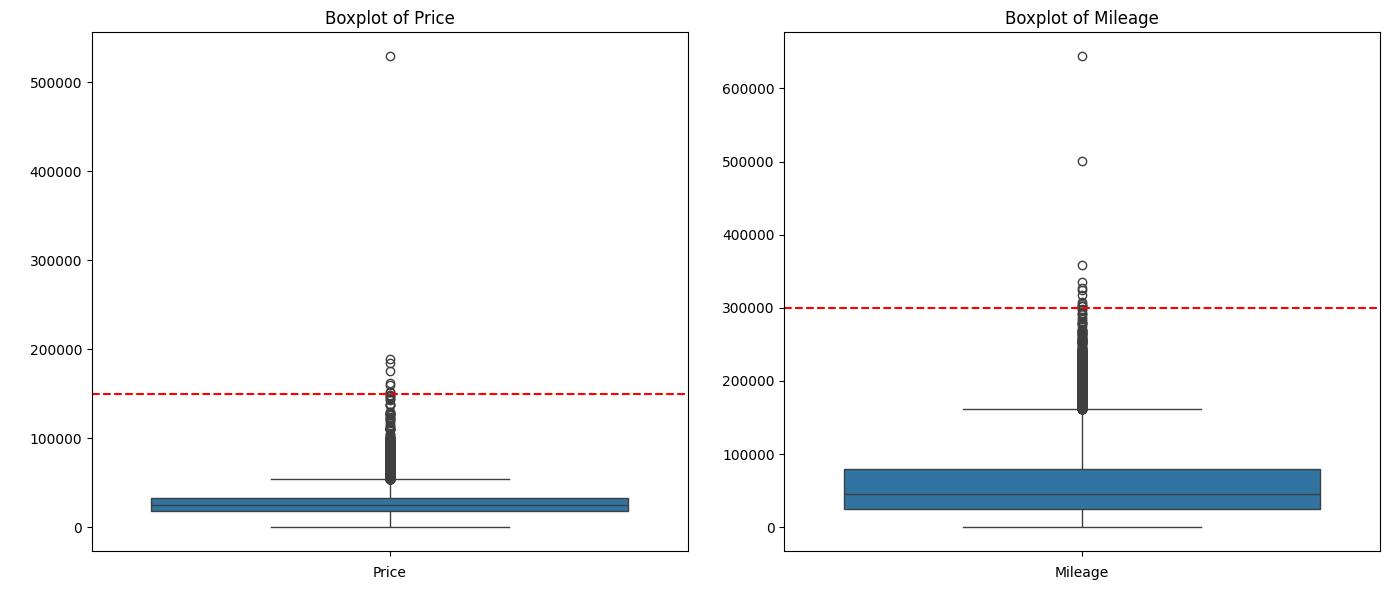

In [ ]:
# Plot price and mileage for outliers

def plot_boxplots(df, column_names):
    """
    Plots boxplots for the specified columns to visually inspect for outliers, includes 
    horizontal line for theoretical cutoff.
    """
    plt.figure(figsize=(14, 6))
    for i, (column_name, cutoff) in enumerate(zip(column_names, cutoff_values), 1):
        plt.subplot(1, len(column_names), i)
        sns.boxplot(y=df[column_name])
        plt.axhline(y=cutoff, color='r', linestyle='--')  # Add a horizontal line for theoretical cutoff
        plt.title(f'Boxplot of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel(' ')
    
    plt.tight_layout()
    plt.show()

# Define cutoff values for 'Price' and 'Mileage'
cutoff_values = [150000, 300000]

plot_boxplots(df_raw, ['Price', 'Mileage'])

In [ ]:
# Delete max outliers

cutoff_values = [150000, 300000]

price_exceed_count = df_raw[df_raw['Price'] > cutoff_values[0]].shape[0]
mileage_exceed_count = df_raw[df_raw['Mileage'] > cutoff_values[1]].shape[0]

print(f"Number of rows where Price exceeds {cutoff_values[0]}: {price_exceed_count}")
print(f"Number of rows where Mileage exceeds {cutoff_values[1]}: {mileage_exceed_count}")

df_raw = df_raw[(df_raw['Price'] <= cutoff_values[0]) & (df_raw['Mileage'] <= cutoff_values[1])]

print(f"Number of rows remaining after removal: {df_raw.shape[0]}")

Number of rows where Price exceeds 150000: 8
Number of rows where Mileage exceeds 300000: 12
Number of rows remaining after removal: 83346


In [ ]:
# Delete Min Outliers

# Count the number of rows before deletion
rows_before = df_raw.shape[0]

# Count the number of rows where Price is under 2000 and Mileage is less than 1000
price_under_2000 = df_raw[df_raw['Price'] < 2000].shape[0]
mileage_under_1000 = df_raw[df_raw['Mileage'] < 1000].shape[0]

# Delete rows where Price is under 2000 and Mileage is less than 1000
df_raw = df_raw[(df_raw['Price'] >= 2000) & (df_raw['Mileage'] >= 1000)]

# Count the number of rows after deletion
rows_after = df_raw.shape[0]

# Print the number of rows deleted for each column and the total
print(f"Number of rows where Price was under 2000: {price_under_2000}")
print(f"Number of rows where Mileage was under 1000: {mileage_under_1000}")
print(f"Number of rows remaining after removal: {df_raw.shape[0]}")


Number of rows where Price was under 2000: 9
Number of rows where Mileage was under 1000: 444
Number of rows remaining after removal: 82895


### Removed rows with prices above 150,000 dollars & below 2,000 dollars and rows with mileage above 300,000 miles & below 1,000 miles. This removed 493 rows out of 83,346 original rows of data, only 0.5% of the total data was removed to exclude outliers. 

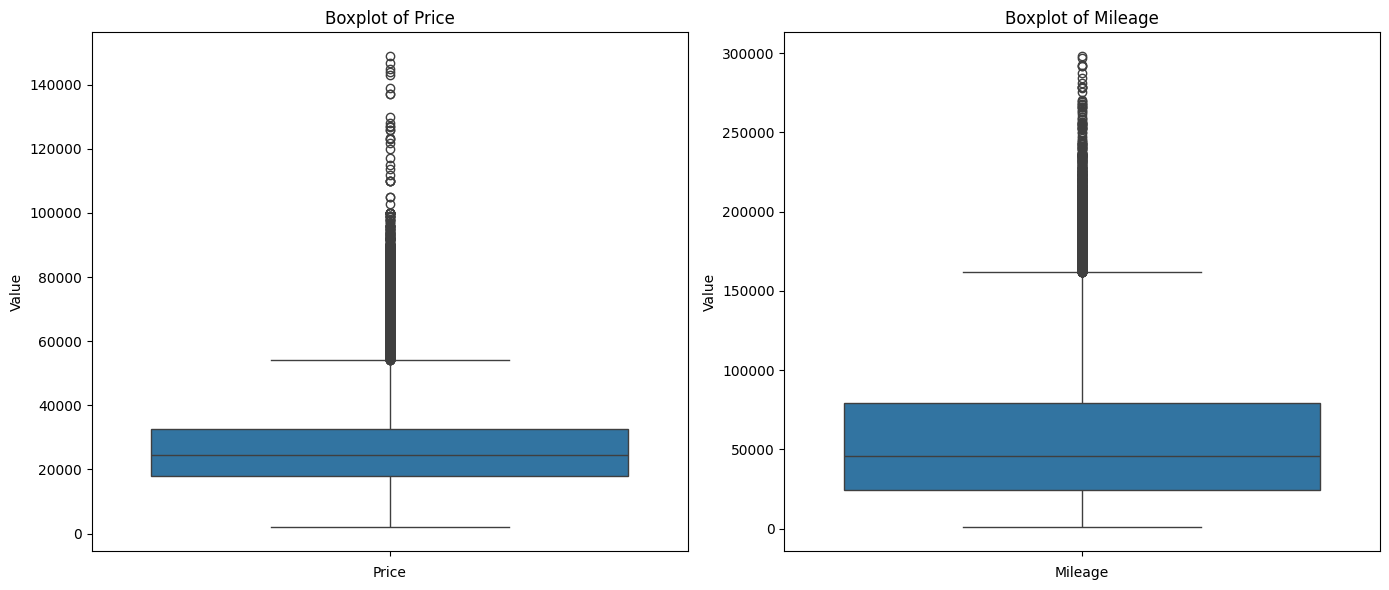

In [ ]:
def plot_boxplots(df, column_names):
    """
    Plots boxplots for the specified columns to visually inspect for outliers.
    """
    plt.figure(figsize=(14, 6))
    for i, column_name in enumerate(column_names, 1):
        plt.subplot(1, len(column_names), i)
        sns.boxplot(y=df[column_name])
        plt.title(f'Boxplot of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Value')
    
    plt.tight_layout()
    plt.show()

# Plot vertical boxplots to visualize outliers in 'Price' and 'Mileage'
plot_boxplots(df_raw, ['Price', 'Mileage'])

In [ ]:
print("Summary Statistics")# Summary statistics for int columns
print(round(df_raw.describe(),1))

Summary Statistics
          Year     Price   Mileage
count  82895.0   82895.0   82895.0
mean    2019.6   26739.8   55752.9
std        3.1   13176.0   40646.7
min     2010.0    2000.0    1000.0
25%     2018.0   17995.0   24527.0
50%     2021.0   24385.0   45911.0
75%     2022.0   32488.0   79523.0
max     2024.0  148990.0  298263.0


In [ ]:
df_raw.to_csv('cleaned_data_july_21st.csv', index=False)
print('saved', datetime.fromtimestamp(time.time()))

saved 2024-08-19 23:26:08.667681


# Validation Dataset

#### Scraped August 16th

In [ ]:
df_raw_validation = pd.read_csv('raw_data_aug_16th.csv') 
print('Done')

Done


In [ ]:
# Drop 'Listing ID' column to identify duplicates, otherwise it wont find duplicates
df_raw_validation_noListing = df_raw_validation.drop(columns=['Listing ID'])

# Identify duplicates
duplicates_mask = df_raw_validation_noListing.duplicated()

# Number of duplicate rows
num_duplicates = duplicates_mask.sum()
print(f"Found {num_duplicates} duplicate rows.")

# Remove duplicate rows from the original DataFrame while maintaining 'Listing ID'
df_raw_validation = df_raw_validation[~duplicates_mask].reset_index(drop=True)

# Print information about the cleaning process
print(f"Rows after cleaning: {df_raw_validation.shape[0]}")
print(f"Rows deleted: {num_duplicates}")

Found 1 duplicate rows.
Rows after cleaning: 9389
Rows deleted: 1


In [ ]:
def delete_rows_with_empty_cells(df):
    empty_cells_count = df.isnull().sum().sum()  
    rows_before = df.shape[0]  
    df.dropna(inplace=True)  
    rows_after = df.shape[0]  
    rows_deleted = rows_before - rows_after  
    
    return empty_cells_count, rows_deleted

# Apply the function to the existing DataFrame
empty_cells_count, rows_deleted = delete_rows_with_empty_cells(df_raw_validation)

print(f"Empty cells count: {empty_cells_count}")
print(f"Rows deleted: {rows_deleted}")
print('Empty cells left:',df_raw_validation.isnull().sum().sum())

Empty cells count: 103
Rows deleted: 92
Empty cells left: 0


In [ ]:
# Convert 'price' column to integer, gets rid of float
df_raw_validation['Price'] = df_raw_validation['Price'].astype(int)
df_raw_validation.head(5)

,Listing ID,Trim,Make,Year,Model,Price,Body Style,City,State,Mileage,Stock Type
0,73cd31ae-31a4-46e5-a6a9-917fa02ac002,denali,gmc,2020,sierra 3500,69969,truck,Lowell,MA,12880,used
1,997762f9-cd07-4603-8f96-5f6449bf2a3d,denali ultimate,gmc,2023,sierra 1500,65795,truck,Waukesha,WI,29780,used
2,f79a8ccd-f35d-4e08-8472-ae1a4d339f7d,sle,gmc,2018,sierra 1500,31775,truck,Auburn,ME,54553,used
3,3cf5088c-640a-41fa-8cbb-9ce157172adf,slt,gmc,2019,sierra 1500,36990,truck,Austin,TX,39594,used
4,344d3cfe-8336-471c-a2e3-b3957a45ec84,denali,gmc,2018,terrain,24097,suv,Mechanicsburg,PA,16086,used


In [ ]:
# Count all models by letter so i can combine and drop unnecessary models 
# Iterate thru 1 lettter at a time
count = df_raw_validation[df_raw_validation['Model'].str.startswith('w')]
count['Model'].value_counts()

Model
wrangler unlimited        115
wrx                        55
wrangler                   42
wrx sti                    42
wagoneer                   24
wrangler 4xe               10
wrangler unlimited 4xe      9
wrangler jk unlimited       9
wagoneer l                  6
wrangler jk                 1
Name: count, dtype: int64

#### Models for validation dataset

In [ ]:
# combining models and correcting typos for consistency 

# a models
# none

# b models
# none

# c models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('cr_v', 'cr-v') # replaces the model name
df_raw_validation['Model'] = df_raw_validation['Model'].replace('cr_v hybrid', 'cr-v hybrid')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('c_hr', 'c-hr')
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} si" if row['Model'] == 'civic si' else row['Trim'], axis=1) # adds value to trim
df_raw_validation['Model'] = df_raw_validation['Model'].replace('civic si', 'civic')
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} type r" if row['Model'] == 'civic type r' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('civic type r', 'civic')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('clarity plug_in hybrid', 'clarity plug-in hybrid')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('corvette stingray', 'corvette') # stingray is base model for c7 and c8
df_raw_validation['Model'] = df_raw_validation['Model'].replace('c_max energi', 'c-max energi')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('c_max hybrid', 'c-max hybrid')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('cr_z', 'cr-z')

# d models
# none

# e models
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} n" if row['Model'] == 'elantra n' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('elantra n', 'elantra')
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} max" if row['Model'] == 'expedition max' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('expedition max', 'expedition')
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} super duty" if row['Model'] == 'e350 super duty' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('e350 super duty', 'e350')

# f models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('f_150', 'f-150')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('f_250', 'f-250')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('f_350', 'f-350')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('f_450', 'f-450')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('f_150 lightning', 'f-150 lightning')
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} st" if row['Model'] == 'focus st' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('focus st', 'focus')
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} rs" if row['Model'] == 'focus rs' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('focus rs', 'focus')

# g models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('gt_r', 'gt-r')

# h models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('hr_v', 'hr-v')

# i models
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} sti" if row['Model'] == 'impreza wrx sti' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('impreza wrx sti', 'impreza wrx')
df_raw_validation['Trim'] = df_raw_validation.apply(lambda row: f"{row['Trim']} outback sport" if row['Model'] == 'impreza outback sport' else row['Trim'], axis=1)
df_raw_validation['Model'] = df_raw_validation['Model'].replace('impreza outback sport', 'impreza')

# j models
# none 

# k models
# none

# l models
# none

# m models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('mustang mach_e', 'mustang mach-e')

# n models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('nv cargo', 'nv cargo nv1500')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('niro plug_in hybrid', 'niro plug-in hybrid')

# o models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('optima plug_in hybrid', 'optima plug-in hybrid')

# p models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('prius plug_in', 'prius plug-in')

# q models
# none

# r models
# none

# s models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('silverado 1500 ld', 'silverado 1500')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('santa fe plug_in hybrid', 'santa fe plug-in hybrid')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('sonata plug_in hybrid', 'sonata plug-in hybrid')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('sorento plug_in hybrid', 'sorento plug-in hybrid')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('sportage plug_in hybrid', 'sportage plug-in hybrid')

# t models
df_raw_validation['Model'] = df_raw_validation['Model'].replace('transit_150', 'transit 150')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('transit_250', 'transit 250')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('transit_350', 'transit 350')
df_raw_validation['Model'] = df_raw_validation['Model'].replace('tucson plug_in hybrid', 'tucson plug-in hybrid')

# u models
# none

# v models
# none

# w models
# none

# x models
# none

# y models
# none

# z models
# none

# 1-9 models
# none

print('Models formated for validation data')

Models formated for validation data


#### Trim for validation dataset

In [ ]:
# Group by 'Make', 'Model', and 'Trim' and count occurrences
trim_counts = df_raw_validation.groupby(['Make', 'Model', 'Trim']).size().reset_index(name='Count')

# Sort the data for better readability
trim_counts = trim_counts.sort_values(by=['Make', 'Model', 'Count'], ascending=[True, True, False])

# To print trim counts by make
for make in trim_counts['Make'].unique():
    make_df = trim_counts[trim_counts['Make'] == make]
    print(f"Make: {make}")
    for model in make_df['Model'].unique():
        model_df = make_df[make_df['Model'] == model]
        print(f"  Model: {model}")
        print(model_df[['Trim', 'Count']])
        print('\n')


Make: chevrolet
  Model: avalanche
       Trim  Count
0   1500 ls      2
1   1500 lt      1
2  1500 ltz      1
3        ls      1
4        lt      1
5       ltz      1


  Model: blazer
       Trim  Count
7       2lt     30
11       rs     20
8       3lt     11
10  premier      6
9        lt      2
6       1lt      1


  Model: bolt euv
      Trim  Count
12  fwd lt      4
13      lt      1


  Model: bolt ev
           Trim  Count
18           lt      4
19      premier      3
17  fwd premier      2
14          2lt      1
15      fwd 1lt      1
16       fwd lt      1


  Model: camaro
             Trim  Count
24            2ss      9
20            1lt      8
21            1ss      6
23            2lt      4
25             lt      2
22            2ls      1
26  rwd coupe lt1      1
27            zl1      1


  Model: captiva sport
   Trim  Count
29   lt      3
28  2ls      2
30  ltz      1


  Model: cobalt
   Trim  Count
31   ls      1
32   lt      1


  Model: colorado
          Trim  

In [ ]:
# combining trims for models and correcting typos for consistency and cleaning

# Create a dictionary for trim name replacements
# combining trims for models and correcting typos for consistency and cleaning

# Create a dictionary for trim name replacements
# Use a dictionary with .replace at the end to organize trims easier 

trim_formatting = {

# Chevrolet Models & Trim    
    'chevrolet': {
        'avalanche': {
            '1500 ltz': 'ltz',
            '1500 lt': 'lt',
            '1500 ls': 'ls',
        },
        'aveo': {
            '5 ls': 'ls',
        },
        'blazer': {
            'base': 'lt',
        },
        'bolt euv': {
            'fwd premier': 'premier',
            'fwd lt': 'lt',
            'lt hatchback 4d': 'lt',
        },
        'bolt ev': {
            'fwd premier': 'premier',
            'fwd lt': 'lt',
            'fwd 1lt': '1lt',
            'fwd 2lt': '2lt',
            'lt hatchback 4d': 'lt',
        },
        'camaro': {
            'lt': '1lt',
            'rwd coupe lt1': 'lt1',
            'ss': '1ss',
            'ls': '1ls',
            'rwd convertible lt1': 'lt1',
            'ls coupe 2d': '1ls',
        },
        'colorado': {
            'lt trail boss': 'trail boss',
            '2wd lt': 'lt',
            'base': 'lt',
            '2wd work truck': 'work truck',
            '4wd z71': 'z71',
            '4wd trail boss': 'trail boss',
            '4wd zr2': 'zr2',
        },
        'corvette': {
            'stingray 3lt': 'stingray w/3lt',
            '3lt': 'stingray w/3lt',
            'z06 hardtop': 'z06',
            'stingray z51': 'stingray z51',
            'stingray 1lt': 'stingray w/1lt',
            'stingray 2lt': 'stingray w/2lt',
            'zr_1': 'zr1',
            '1lt': 'stingray w/1lt',
            '2lt': 'stingray w/2lt',
            '427': 'base',
            'stingray z51 3lt luxury convertible sport coupe': 'stingray z51',
            'z06 w/3lz': 'z06',
        },
        'cruze': {
            'ls auto': 'ls',
            'lt auto': 'lt',
        },
        'equinox': {
            'lt w/1lt': '1lt',
            'awd 4dr rs': 'awd rs',
        },
        'express 1500': {
            '1500 3dr cargo van': 'work van',
        },
        'express 2500': {
            'rwd 2500 regular wheelbase lt': 'lt',
        },
        'express 3500': {
            "135''wb low roof minivan/van w/shelving storage system": "lt",
            '3500': 'lt',
            '3500 3dr extended cargo van w/1wt': 'rwd 3500 extended wheelbase wt',
            '3500 3dr cargo van w/1wt': 'work van',
        },
        'impala': {
            'ls fleet': 'fleet',
        },
        'malibu': {
            'fwd lt': 'lt',
            'fwd rs': 'rs',
            'fwd 1lt': '1lt',
            'fwd premier': 'premier',
            '4dr sdn lt': 'lt',
            'fwd 2lt': '2lt',
            'l': 'lt',
        },
        'silverado 1500': {
            'work truck': 'wt',
            'base': 'lt',
            'work truck 1wt': 'wt',
            'work truck 2wt': 'wt',
        },
        'silverado 1500 limited': {
            'custom': 'custom trail boss',
            'lt trail boss': 'custom trail boss',
        },
        'silverado 2500': {
            'work truck': 'wt',
        },
        'silverado 3500': {
            'work truck': 'wt',
            'work': 'wt',
        },
        'sonic': {
            'fwd hatchback 1fl 5_door': 'lt',
            'fwd sedan lt': 'sedan lt',
            'fwd sedan premier': 'sedan premier',
            '4dr sdn premier': 'sedan premier',
        },
        'ss': {
            '6_speed manual': 'base',
            'na': 'base',
            '4dr sdn': 'base',
            'sedan': 'base',
        },
        'suburban': {
            'z71 sport utility 4d': '4wd z71',
            'z71': '4wd z71',
            '1500 lt': 'lt',
            '1500 ltz': 'ltz',
            '1500 ls': 'ls',
        },
        'tahoe': {
            '2wd rst': 'rst',
            '2wd high country': 'high country',
        },
        'traverse': {
            'lt w/1lt': '1lt',
        },
        'trax': {
            'fwd activ': 'activ',
            'fwd 1rs': '1rs',
            'fwd 2rs': '2rs',
        },
    },


# Ford Models & Trim    
   'ford': {
        'c-max hybrid': {
            '5dr hb se': 'se',
        },
       'e350': {
            'xl super duty': 'super duty',
        },
        'edge': {
            'st line': 'st_line',
        },
        'escape': {
            'base': 'se',
        },
        'expedition': {
            'max limited': 'limited max',
            'max platinum': 'platinum max',
            'max xlt': 'xlt max',
        },
        'f-150': {
            'king_ranch supercrew 5.5_ft. 4wd': 'king ranch',
            'harley_davidson': 'harley davidson',
            '145': 'xlt',
            'roush 5.11 tactical': 'roush',
            'stx supercrew 4wd': 'stx supercrew',
            'supercrew': 'xlt supercrew',
        },
        'f-250': {
            "4wd supercab 158'' lariat": "lariat",
            'lariat 4wd crew cab 6.75 box': 'lariat',
            'xl 4x2 4dr supercab 8 ft. lb pickup': 'xl',
        },
        'fiesta': {
            'se 4dr hatchback': 'se',
            'se 4dr sedan': 'se',
            'st 4dr hatchback': 'st',
        },
        'focus': {
            'st st': 'st',
            'base rs': 'rs',
            'base st': 'st',
        },
        'fusion hybrid': {
            'hybrid se': 'se',
            'hybrid titanium': 'titanium',
            'hybrid sel': 'sel',
            'se hybrid': 'se',
        },
        'mustang': {
            'mach 1 fastback': 'mach 1',
            'dark horse fastback': 'dark horse',
        },
        'ranger': {
            'xlt 2wd supercrew 5 box': 'xlt',
        },
        'transit 250': {
            '148 wb high roof extended cargo': 'base',
            '148 wb medium roof cargo': 'base',
            'base w/60/40 pass_side cargo_doors': 'base',
            'roof w/rwb': 'base',
        },
        'transit 350': {
            '350 hd xlt': 'xlt',
        },
    },


# GMC Models & Trim   
    'gmc': {
        'acadia limited': {
            'base awd 4dr suv': 'limited',
            '4dr limited 3rd row seating': 'limited',
            'base': 'limited',
            'sport utility 4d': 'limited',
        },
        'canyon': {
            'at4 w/leather': 'at4',
            '4wd at4 w/leather': 'at4',
            'at4 with leather': 'at4',
            '2wd elevation': 'elevation',
            '4wd at4x': 'at4x',
            '2wd elevation standard': 'elevation standard',
            '4wd denali': 'denali',
            'at4 w/cloth': 'at4',
            'at4 with cloth': 'at4',
            'sle1': 'sle',
            'sle2': 'sle',
        },
        'savana 3500': {
            '3500 3dr cargo van w/ 1wt': 'cargo van',
            'rwd 3500 extended wheelbase ls': 'extended',
            'rwd 3500 regular wheelbase work van': 'work van',
        },
        'sierra 1500': {
            '4wd crew cab 147': 'slt',
            'preferred group 1': 'slt',
            'slt crewcab 4wd': 'slt',
        },
        'sierra 2500': {
            'pro': 'work truck',
            'wt': 'work truck',
        },
        'terrain': {
            'awd at4': 'at4',
            'sl': 'slt',
        },
        'yukon': {
            'awd at4': 'at4',
            'gmc yukon, at4, loaded, lifted, toyo tires': 'at4',
        },
        'yukon xl': {
            'awd at4': 'at4',
            '1500 denali': 'denali',
            '1500 slt': 'slt',
            '1500 sle': 'sle',
        },
    },

    
# Honda Models & Trim   
    'honda': {
        'accord': {
            'lx 4dr sedan cvt': 'lx',
            'touring v6': 'touring',
            'ex_l w/navigation & honda sensing': 'ex_l',
            '4dr i4 cvt sport': 'sport',
            'lx 4dr sedan': 'lx',
            'lx premium': 'lx',
            'ex_l v_6': 'ex_l',
            'sport 4dr sedan (1.5t i4 cvt)': 'sport 1.5t',
            'sport special edition': 'sport',
        },
        'accord hybrid': {
            'sport_l w/o bsi': 'sport_l',
        },
        'civic': {
            'ex_l navi': 'ex_l',
            'ex_l w/navi': 'ex_l',
            'base si': 'si',
            'sport touring': 'sport',
            'touring type r': 'type r',
            'base (m6) type r': 'type r',
            'limited edition type r': 'type r',
            'base type r': 'type r',
        },
        'cr-v': {
            '2wd ex': 'ex',
            '2wd ex_l': 'ex_l',
            'ex_l awd': 'awd ex_l',
            'ex_l 2wd': 'ex_l',
            'lx awd': 'awd lx',
            'ex awd': 'awd ex',
            '2wd special edition': 'special edition',
            'ex 2wd': 'ex',
            '2wd touring': 'touring',
            'lx 2wd': 'lx',
            '2wd lx': 'lx',
            'ex_l w/navigation': 'ex_l',
            'ex awd 4dr suv': 'awd ex',
            'ex_l sport utility 4d': 'ex_l',
            'sport_l': 'sport',
            'touring awd 4dr suv': 'awd touring',
        },
        'cr-v hybrid': {
            'hybrid sport touring': 'sport touring',
            'hybrid sport': 'sport',
            'hybrid touring': 'touring',
            'hybrid ex': 'ex',
            'hybrid ex_l': 'ex_l',
            'hybrid sport_l': 'sport_l',
            'hybrid lx': 'ex_l',
            'sport touring awd': 'sport touring',
        },
        'cr-z': {
            'ex w/navi 2dr hatchback cvt': 'ex',
        },
        'hr-v': {
            '2wd sport': 'sport',
            'sport awd cvt': 'awd sport',
            'ex_l w/navigation': 'ex_l',
        },
        'insight': {
            'ex 4dr hatchback': 'ex',
        },
        'odyssey': {
            'ex_l w/navigation/res': 'ex_l',
            'ex_l w/navi/res': 'ex_l',
        },
        'passport': {
            '2wd ex_l': 'ex_l',
            '2wd sport': 'sport',
            '2wd touring': 'touring',
            'awd black': 'black edition',
            'ex l awd 4dr suv': 'awd ex_l',
            'trailsport awd': 'awd trailsport',
        },
        'pilot': {
            '2wd special edition': 'special edition',
            '2wd ex_l': 'ex_l',
            '2wd sport': 'sport',
            'touring 8_passenger': 'touring 8 passenger',
            'touring 7_passenger': 'touring',
            'awd ex_l 7 passenger': 'awd ex_l',
            '2wd ex_l 7 passenger': 'ex_l',
            '2wd ex': 'ex',
            '2wd ex_l 8 passenger': 'ex_l 8 passenger',
            '2wd lx': 'lx',
        },
        'ridgeline': {
            'black': 'black edition',
        },
    },


# Hyundai Models & Trim   
    'hyundai': {
        'accent': {
            'se sedan 4d': 'se',
        },
        'elantra': {
            'n_line': 'n line',
            'se value edition': 'se',
            'automatic n': 'n',
            'base n': 'n',
            'manual n': 'n',
        },
        'equus': {
            'signature 4dr sedan': 'signature',
        },
        'genesis': {
            '3.8l': '3.8',
        },
        'kona n': {
            'fwd': 'base',
        },
        'palisade': {
            'essential fwd': 'essential',
            'limited sport utility 4d': 'limited',
        },
        'santa cruz': {
            '2.5l sel': 'sel',
            '2.5t limited': 'limited',
            'preferred awd with trend package': 'xrt awd',
        },
        'santa fe': {
            'calligraphy awd': 'calligraphy',
            'sel 2.0': 'sel',
            'sel awd': 'sel',
        },
        'santa fe sport': {
            '2.0t': '2.0l turbo',
            'ultimate': '2.0l turbo ultimate',
        },
        'sonata': {
            'sel+': 'sel plus',
            'sport+': 'sport plus',
        },
        'tucson': {
            'limited awd': 'limited',
            'sel awd 4dr suv': 'sel',
            'value awd 4dr suv': 'value',
        },
        'tucson hybrid': {
            'sel convenience awd': 'sel convenience',
        },
        'veloster': {
            're:flex w/black': 're:flex',
        },
        'veloster n': {
            'n': 'base',
        },
        'venue': {
            'sel ivt': 'sel',
        },
    },


# JEEP Models & Trim
    'jeep': {
        'cherokee': {
            '80th anniversary fwd': '80th anniversary',
            'latitude fwd': 'latitude',
            'limited fwd': 'limited',
            '75th anniversary edition 4x4': '75th anniversary 4x4',
            '75th anniversary edition': '75th anniversary',
            '75th anniversary edition fwd': '75th anniversary',
            'altitude fwd': 'altitude',
        },
        'compass': {
            '80th special edition': '80th anniversary',
            'limited fwd': 'limited',
            'all_new latitude': 'latitude',
            'all_new sport': 'sport',
            '75th anniversary edition 4x4': '75th anniversary 4x4',
            'latitude fwd': 'latitude',
            'altitude fwd': 'altitude',
            'latitude lux fwd': 'latitude lux',
            'sun and wheel fwd': 'sun and wheel',
        },
        'gladiator': {
            "willy's": 'willys',
        },
        'grand cherokee': {
            'limited 4x2': 'limited',
            '75th anniversary edition': '75th anniversary',
            '80th anniversary 4x2': '80th anniversary',
            'freedom 4x2': 'freedom',
            'laredo e 4x2': 'laredo e',
            'altitude x 4x2': 'altitude x',
            'laredo 4x2': 'laredo',
            'laredo x 4x2': 'laredo x',
        },
        'grand cherokee 4xe': {
            'anniversary edition': '30th anniversary',
        },
        'grand cherokee l': {
            'altitude 4x2': 'altitude',
        },
        'grand cherokee wk': {
            'limited 4x2': 'limited',
            'laredo x 4x2': 'laredo x',
        },
        'grand wagoneer': {
            'series ii 4wd': 'series ii 4x4',
            'series ii 4wd grand wagoneer twin turbo': 'series ii 4x4',
        },
        'patriot': {
            'high altitude edition': 'high altitude',
            'altitude edition': 'altitude',
            '75th anniversary edition': '75th anniversary',
            '75th anniversary edition 4x4': '75th anniversary 4x4',
        },
        'renegade': {
            'jeepster fwd': 'jeepster',
            'latitude fwd': 'latitude',
        },
        'wagoneer': {
            'series ii 4x2': 'series ii',
            'series iii 4x2': 'series iii',
            'series ii carbide 4x2': 'series ii carbide',
            'series iii 2wd': 'series iii',
        },
        'wagoneer l': {
            'series iii 4x2': 'series iii',
        },
        'wrangler': {
            '4_door sahara 4x4': 'sahara',
            'willy wheeler 4x4': 'willys wheeler',
            '4_door sahara': 'sahara',
            'all_new unlimited sport s': 'unlimited sport s',
            '4_door high altitude 4x4': 'high altitude',
            '4_door rubicon 4x4': 'rubicon',
            '2_door freedom 4x4': 'freedom',
            '2_door rubicon 4x4': 'rubicon',
            '2_door sport 4x4': 'sport',
            '2_door sport s 4x4': 'sport s',
            '4_door high tide 4x4': 'high tide',
            '4_door rubicon 392 4x4': 'rubicon 392',
            '4_door sahara altitude 4x4': 'sahara altitude',
            '4_door sport altitude 4x4': 'sport altitude',
            '4_door sport s 4x4': 'sport s',
            '4_door willys 4x4': 'willys',
            'all_new sport s': 'sport s',
            'all_new unlimited rubicon': 'unlimited rubicon',
            'all_new unlimited sahara': 'unlimited sahara',
            'sahara 4wd': 'sahara',
            "willy's": "willys",
            'sport 4x4': 'sport',
            'islander 4x4': 'islander',
            'sport s 4x4': 'sport s',
            'willys 4x4': 'willys',
            'rubicon 4x4': 'rubicon',
            'smoky mountain 4x4': 'smoky mountain',
            'willys sport 4x4': 'willys sport',
            'winter 4x4': 'winter',
        },
        'wrangler 4xe': {
            '4x4': 'rubicon',
            'rubicon 4x4': 'rubicon',
        },
        'wrangler jk': {
            'sahara 4x4': 'sahara',
            'sport 4x4': 'sport',
        },
        'wrangler unlimited': {
            'willys 4x4': 'willys',
            'sport s 4x4': 'sport s',
            'rubicon 4x4': 'rubicon',
            'sahara 4x4': 'sahara',
            'freedom 4x4': 'freedom',
            'islander 4x4': 'islander',
            '80th anniversary 4x4': '80th anniversary',
            'sport altitude 4x4': 'sport altitude',
            'moab 4x4': 'moab',
            'high altitude 4x4': 'high altitude',
            'rubicon 4x4': 'rubicon',
            'sport 4x4': 'sport',
            'willy wheeler 4x4': 'willys wheeler',
            'black and tan 4x4': 'black and tan',
            'high tide 4x4': 'high tide',
            'sahara altitude 4x4': 'sahara altitude',
            'willys sport 4x4': 'willys sport',
            '75th anniversary edition 4x4': '75th anniversary',
            'north edition 4x4': 'north edition',
            'rubicon recon 4x4': 'rubicon recon',
            'smoky mountain 4x4': 'smoky mountain',
            'unlimited rubicon 4x4': 'unlimited rubicon',
            'unlimited sahara 4x4': 'unlimited sahara',
        },
        'wrangler unlimited 4xe': {
            'unlimited sahara': 'sahara',
            'unlimited sahara 4x4': 'sahara',
            'unlimited rubicon': 'rubicon',
            'unlimited sahara high altitude': 'high altitude',
            'unlimited high altitude 4x4': 'high altitude',
            'unlimited rubicon 4x4': 'rubicon',
        },
    },


# KIA Models & Trim    
    'kia': {
        'cadenza': {
            '4dr sdn premium': 'premium',
        },
        'ev6': {
            'light long range': 'light',
        },
        'forte': {
            'ex w/ gray interior pkg, leatherette, heated seats': 'ex',
            'fe 6m': 'fe',
            'gt w/  smart trunk, cloth/leatherette,': 'gt_line',
            'gt_line w/ cloth/leatherette seats, bluetooth,': 'gt_line',
        },
        'k5': {
            'gt 4dr sedan': 'gt_line',
            'lxs certified pre_owned': 'lxs',
            'gt_line**still looks new prem pk': 'gt_line',
            'lxs w/ remote start, heated side mirrors,': 'lxs',
        },
        'k900': {
            'luxury 3.8l': 'luxury',
        },
        'niro': {
            'lxs special edition': 'lxs',
        },
        'niro ev': {
            'ex premium 4dr crossover': 'ex premium',
        },
        'niro plug-in hybrid': {
            'ex fwd': 'ex',
            'sx touring': 'sx',
        },
        'seltos': {
            'nightfall': 'nightfall edition',
            'certified one owner s': 's',
            'lx ivt awd': 'lx',
        },
        'sorento': {
            'ex v6': 'ex',
            'sx prestige x_line': 'x_line sx prestige',
            'ex sport': 'ex',
            '2.4l lx': 'lx',
            'sx_prestige': 'sx prestige',
        },
        'sorento hybrid': {
            'ex awd': 'ex',
            'hybrid ex awd': 'ex',
        },
        'sorento plug-in hybrid': {
            'sx awd': 'sx',
        },
        'soul': {
            'plus': '+',
            'gt line 4dr crossover (2.0l i4)': 'gt_line',
            'exclaim': '!',
        },
        'sportage': {
            'base': 'lx',
            'ex ** like new**': 'ex',
            'nightfall awd': 'nightfall',
            'sx turbo**cf cert 1 owner': 'sx',
            'x_line w/ premium pkg, sunroof, power': 'x_line',
            'x_pro prestigeawd': 'x_pro prestige',
        },
        'sportage hybrid': {
            'sx_prestige': 'sx prestige',
        },
        'stinger': {
            'base awd 18 wheels': 'base',
        },
        'telluride': {
            'sx_prestige x_pro': 'sx prestige x_pro',
            'sx_prestige x_line': 'sx prestige x_line',
            'sx_prestige': 'sx prestige',
            'ex awd': 'ex',
            'ex premium pkg': 'ex',
            'ex********one owner******': 'ex',
            'ex********super clean 1 owner******': 'ex',
            'lx awd': 'lx',
            's awd': 's',
            'sx 4dr suv': 'sx',
            'sx w/ leather, 3rd row, 2nd row captains': 'sx',
            'x_line ex': 'ex x_line',
        },
    },


# Nissan Models & Trim    
    'nissan': {
        '370z': {
            'sport tech': 'sport',
            'nismo tech': 'nismo',
        },
        'altima': {
            'sr fwd': 'sr',
            's fwd': 's',
            'sr vc_turbo fwd': 'sr vc-turbo',
            'platinum fwd': 'platinum',
            '2.0 platinum': 'platinum',
            '2.5 s 4dr sedan': '2.5 s',
            '2.5 sr sedan 4d': '2.5 sr',
            'platinum vc_turbo fwd': 'platinum vc-turbo',
        },
        'armada': {
            'sl 2wd': 'sl',
            'platinum 2wd': 'platinum',
            'sv 2wd': 'sv',
        },
        'cube': {
            '5dr wgn i4 cvt 1.8 s': '1.8 s',
            '1.8s': '1.8 s',
        },
        'frontier': {
            'sv_i4': 'sv',
        },
        'gt-r': {
            'premium dual_clutch 6_speed transmission': 'premium',
            'premium awd 2dr coupe': 'premium',
        },
        'juke': {
            's 4dr crossover': 's',
            'sl sport utility 4d': 'sl',
            'sv awd 4dr crossover': 'sv',
            'nismo': 'nismo rs',
        },
        'leaf': {
            'sv plus 60 kwh': 'sv plus 62 kwh',
            'sv 4dr hatchback': 'sv',
        },
        'murano': {
            'sv fwd': 'sv',
            'sl fwd': 'sl',
            's fwd': 's',
            'platinum fwd': 'platinum',
            'sl awd': 'sl intelligent awd',
        },
        'nv cargo nv1500': {
            '2500 s': 's v6',
        },
        'nv cargo nv2500 hd': {
            'sv': 'sv v6',
            'sv v6/sv v8': 'sv v8',
        },
        'nv passenger nv3500 hd': {
            'sl': 'sl v8',
        },
        'pathfinder': {
            'sv 2wd': 'sv',
            'sl 2wd': 'sl',
            'sl fwd': 'sl',
            'platinum fwd': 'platinum',
            'platinum 2wd': 'platinum',
            'sv fwd': 'sv',
            's 2wd': 's',
            's fwd': 's',
            'sl awd 4dr suv': 'sl 4wd',
        },
        'quest': {
            '3.5 sl': 'sl',
        },
        'sentra': {
            '4dr sdn i4 cvt s': 's',
        },
        'xterra': {
            'off_road': 'off road',
            's 4x2 4dr suv': 's',
        },
    },


# Subaru Models & Trim
    'subaru': {
        'brz': {
            'limited 2dr coupe 6a': 'limited',
            'limited 2dr coupe 6m': 'limited',
        },
        'crosstrek': {
            'base trim level': 'base',
            '2.0i premium heated seats, one owner': '2.0i premium',
            'limited cvt': 'limited',
            'limited, heated leather seats, eyesight': 'limited',
            'premium manual': 'premium',
        },
        'crosstrek hybrid': {
            'hybrid': 'base',
        },
        'forester': {
            '2.5 x premium': '2.5x premium',
            '2.5 x limited': '2.5x limited',
            '2.5 x': '2.5x',
            '2.5 xt limited': '2.5xt limited',
            'base trim level': 'base',
            'premium cvt': 'premium',
            'limited powered tail gate, navigation': 'limited',
        },
        'impreza': {
            '2.5 i premium': '2.5i premium',
            '2.5 i': '2.5i',
            '5_door cvt': '5_door',
            'base outback sport': 'outback sport',
            'base trim level': 'base',
            'premium cvt': 'premium',
            'limited powered tail gate, navigation': 'limited',
        },
        'impreza wrx': {
            'base sti': 'sti',
            'sti limited sti': 'sti limited',
        },
        'legacy': {
            '2.5 i premium': '2.5i premium',
            '2.5 i': '2.5i',
            '2.5i prem awp/pwr moon': '2.5i premium',
        },
        'outback': {
            '2.5 i premium': '2.5i premium',
            '2.5 i limited': '2.5i limited',
            '2.5 i': '2.5i',
            '3.6 r limited': '3.6r limited',
            '2.5i prem': '2.5i premium',
            'limited awd wagon': 'limited',
            'limited, heated steering, navigation': 'limited',
            'premium w/ #13 op pkg': 'premium',
            'limited, new tires, navigation': 'limited',
            'touring xt cvt': 'touring xt',
        },
        'wrx': {
            'base trim level': 'base',
        },
        'wrx sti': {
            'sti': 'base',
            'sti limited': 'limited',
        },
    },


# Toyota Models & Trim
    'toyota': {
        '4runner': {
            'trail': 'trail special edition',
            '40th anniversary': '40th anniversary special edition',
            'nightshade': 'nightshade special edition',
        },
        'c-hr': {
            'nightshade': 'nightshade edition',
            'xle 4dr crossover': 'xle',
        },
        'camry': {
            'se w/special edition pkg': 'se night shade',
            'trd v6 w/two_tone midnight black roof': 'trd v6',
            'xle v6': 'xle',
        },
        'camry hybrid': {
            'hybrid xse': 'xse',
        },
        'corolla': {
            's w/special edition pkg': 's special edition',
        },
        'corolla cross hybrid': {
            'hybrid xse': 'xse',
            'hybrid se': 'se',
        },
        'corolla hybrid': {
            'hybrid le': 'le',
        },
        'highlander': {
            'le i4': 'le',
            'base v6 (a5)': 'base v6',
        },
        'prius': {
            'ii': 'two',
            'iii': 'three',
            'iv': 'four',
            'v': 'five',
            'i': 'one',
            'persona series special edition': 'persona series',
            '5dr hb persona (natl)': 'persona series',
        },
        'rav4': {
            'trd off_road': 'trd off road',
        },
        'rav4 hybrid': {
            'hybrid xse': 'xse',
            'hybrid limited': 'limited',
        },
        'sienna': {
            'xle 7 passenger': 'xle',
            'xse 7 passenger': 'xse',
            'platinum 7 passenger': 'platinum',
            'limited 7_passenger': 'limited',
            'ce': 'se',
            'ltd': 'limited',
        },
        'supra': {
            '2': '2.0',
            '3': '3.0',
            'a91_mt edition': 'a91 edition',
        },
        'tacoma': {
            'trd off_road': 'trd off road',
            '22 toyo tacoma': 'base',
            'v6': 'base',
        },
        'tundra': {
            '1794': '1794 edition',
            'trd pro 5.7l v8': 'trd pro',
            'base': 'sr',
            'trd off_road _ lift + topper + bumper + whls/tires': 'trd pro',
        },
        'tundra hybrid': {
            '1794': '1794 edition',
        },
    }
}


def map_trim(row):
    make = row['Make'].lower()  # Convert make to lowercase
    model = row['Model'].lower()  # Convert model to lowercase
    trim = row['Trim'].lower()  # Convert trim to lowercase
    
    # Try to get the formatted trim from the dictionary
    formatted_trim = trim_formatting.get(make, {}).get(model, {}).get(trim, None)
    
    # If no formatted trim is found, return the original trim
    if formatted_trim is None:
        return row['Trim']
    else:
        return formatted_trim

# Assuming `df_raw_validation` has 'Make', 'Model', and 'Trim' columns
df_raw_validation['Trim'] = df_raw_validation.apply(map_trim, axis=1)
print('Trim is formatted for validation data')

Trim is formatted for validation data


#### Outliers

In [ ]:
# Delete max & min outliers

cutoff_values = [150000, 300000]

price_exceed_count = df_raw_validation[df_raw_validation['Price'] > cutoff_values[0]].shape[0]
mileage_exceed_count = df_raw_validation[df_raw_validation['Mileage'] > cutoff_values[1]].shape[0]

print(f"Number of rows where Price exceeds {cutoff_values[0]}: {price_exceed_count}")
print(f"Number of rows where Mileage exceeds {cutoff_values[1]}: {mileage_exceed_count}")

df_raw_validation = df_raw_validation[(df_raw_validation['Price'] <= cutoff_values[0]) & (df_raw_validation['Mileage'] <= cutoff_values[1])]

# Count the number of rows where Price is under 2000 and Mileage is less than 1000
price_under_2000 = df_raw_validation[df_raw_validation['Price'] < 2000].shape[0]
mileage_under_1000 = df_raw_validation[df_raw_validation['Mileage'] < 1000].shape[0]

# Delete rows where Price is under 2000 and Mileage is less than 1000
df_raw_validation = df_raw_validation[(df_raw_validation['Price'] >= 2000) & (df_raw_validation['Mileage'] >= 1000)]

# Count the number of rows after deletion
rows_after = df_raw_validation.shape[0]

# Print the number of rows deleted for each column and the total
print(f"\nNumber of rows where Price was under 2000: {price_under_2000}")
print(f"Number of rows where Mileage was under 1000: {mileage_under_1000}")
print(f"\nNumber of rows remaining after removal: {df_raw_validation.shape[0]}")

Number of rows where Price exceeds 150000: 2
Number of rows where Mileage exceeds 300000: 2

Number of rows where Price was under 2000: 1
Number of rows where Mileage was under 1000: 63

Number of rows remaining after removal: 9229


In [ ]:
df_raw_validation.to_csv('cleaned_data_aug_16th.csv', index=False)
print('Saved', datetime.fromtimestamp(time.time()),'\n')

print('Number of Rows and Columns:', df_raw_validation.shape)
print('\n')

print('Summary Statistics for Validation Data:') # Summary statistics for int columns
print(round(df_raw_validation.describe(),1))

Saved 2024-08-20 17:12:47.720278 

Number of Rows and Columns: (9229, 11)


Summary Statistics for Validation Data:
         Year     Price   Mileage
count  9229.0    9229.0    9229.0
mean   2019.9   26628.8   55274.0
std       3.0   13067.6   39231.3
min    2010.0    2950.0    1002.0
25%    2018.0   17998.0   24565.0
50%    2021.0   23990.0   47128.0
75%    2022.0   31702.0   78890.0
max    2024.0  109890.0  270964.0
